In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
df=pd.read_csv("D:/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.shape

(8124, 23)

In [7]:
df.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [8]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [9]:
for col in df.columns:
    df[col] = lbl.fit_transform(df[col])

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Univariate Analysis

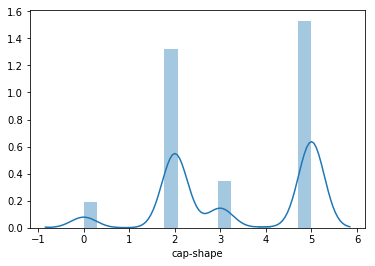

In [12]:
import seaborn as sns
sns.distplot(df['cap-shape'])
plt.show()

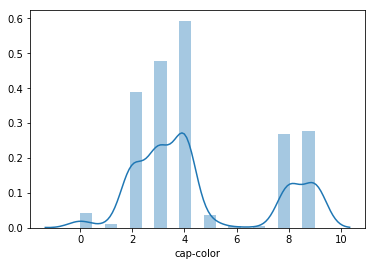

In [13]:
sns.distplot(df['cap-color'])
plt.show()

# Bivariate Analysis

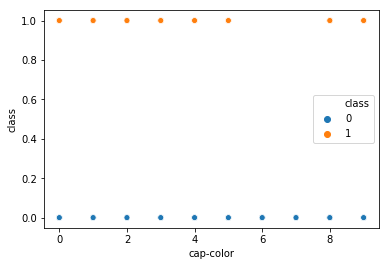

In [14]:
sns.scatterplot(x='cap-color', y='class', hue='class', data=df)

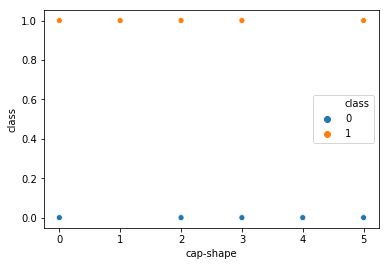

In [15]:
sns.scatterplot(x='cap-shape', y='class', hue='class', data=df)

In [16]:
df.groupby(['odor']).agg({'class': 'mean'}).sort_values(by= 'class', ascending = False).head()

,class
odor,
1,1.0
2,1.0
4,1.0
6,1.0
7,1.0


# Heatmap

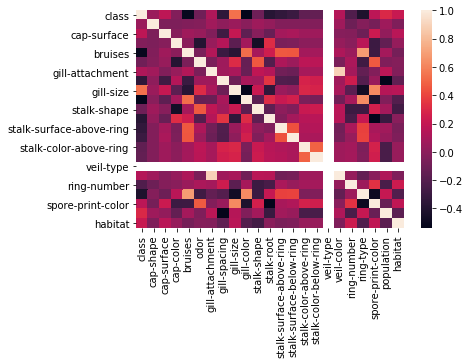

In [17]:
heat_map = sns.heatmap(df.corr())

# Removing outliers

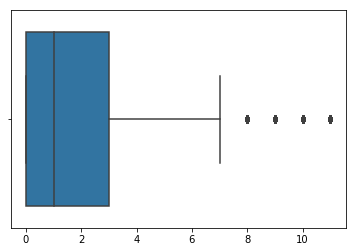

In [18]:
sns.boxplot(df)

In [26]:
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
z = np.abs(stats.zscore(df))
df1 = df[(z < 3).all(axis=1)] #outliers with z-score >3 are removed

In [27]:
df1.shape

(0, 23)

# Modeling 

In [28]:
#separate the x and y variables
y = df['class']
x = df.iloc[:,1:23]

In [29]:
from collections import Counter
Counter(y)

Counter({1: 3916, 0: 4208})

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [31]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2)
k_means.fit(x_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
k_means_predict = k_means.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
k_means_acc = accuracy_score(k_means_predict, y_test)
k_means_conf = confusion_matrix(k_means_predict, y_test)

In [34]:
k_means_acc

0.29245283018867924

In [35]:
k_means_conf

array([[  55,  505],
       [1220,  658]], dtype=int64)

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(y_test, k_means_predict)
k_means_auc = auc(fpr,tpr)

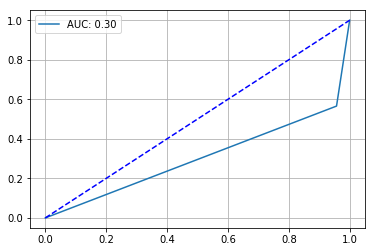

In [37]:
plt.plot(fpr,tpr, label = 'AUC: %0.2f' % k_means_auc)
plt.plot([0,1], [0,1], 'b--')
plt.legend()
plt.grid()

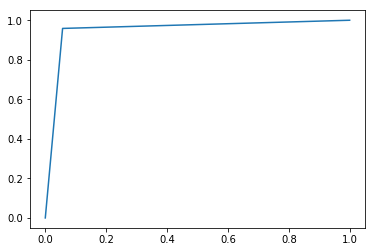

In [40]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict= lr.predict(x_test)
lr_accuracy = accuracy_score(lr_predict, y_test)
lr_conf = confusion_matrix(lr_predict, y_test)
fpr, tpr, threshold = roc_curve(lr_predict, y_test)
lr_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % lr_auc)

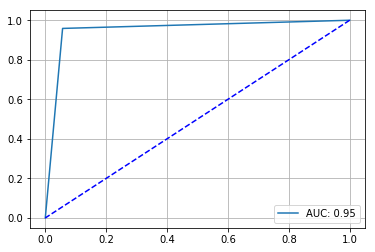

In [41]:
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % lr_auc)
plt.plot([1,0],[1,0],'b--')
plt.legend()
plt.grid()

In [42]:
lr_accuracy

0.950369155045119

In [43]:
lr_conf

array([[1228,   74],
       [  47, 1089]], dtype=int64)

In [45]:
import pickle
#save model to disk
saved_model = pickle.dumps(KMeans) 